In [ ]:
# pip install python-dotenv pandas os openpyxl

# DATA ENGINEERING

## Overview of Data

Show the distribution of all original files

In [20]:
import os
from dotenv import load_dotenv
import pandas as pd

In [ ]:
# load_dotenv(dotenv_path=".env")

folder_path = "./data"

if not folder_path:
    raise ValueError("path not found")

files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

for file in sorted(files):
    path = os.path.join(folder_path, file)
    df = pd.read_excel(path)
    print(f"{file}: {df.shape[0]} rows × {df.shape[1]} columns")

2024-07-01.xlsx: 4307 rows × 63 columns
2024-07-08.xlsx: 4296 rows × 63 columns
2024-07-15.xlsx: 4296 rows × 63 columns
2024-07-22.xlsx: 4296 rows × 63 columns
2024-07-29.xlsx: 4296 rows × 63 columns
2024-08-05.xlsx: 4296 rows × 63 columns
2024-08-12.xlsx: 4296 rows × 63 columns
2024-08-19.xlsx: 4296 rows × 63 columns
2024-08-26.xlsx: 4296 rows × 63 columns
2024-09-02.xlsx: 4296 rows × 63 columns
2024-09-09.xlsx: 4296 rows × 63 columns
2024-09-16.xlsx: 4296 rows × 63 columns
2024-09-23.xlsx: 4296 rows × 63 columns
2024-09-30.xlsx: 4296 rows × 63 columns
2024-10-07.xlsx: 4296 rows × 63 columns
2024-10-14.xlsx: 4296 rows × 63 columns
2024-10-21.xlsx: 4296 rows × 63 columns
2024-10-28.xlsx: 4296 rows × 63 columns
2024-11-04.xlsx: 4296 rows × 63 columns
2024-11-11.xlsx: 4296 rows × 63 columns
2024-11-18.xlsx: 4296 rows × 63 columns
2024-11-25.xlsx: 4296 rows × 63 columns
2024-12-02.xlsx: 4296 rows × 63 columns
2024-12-09.xlsx: 4296 rows × 63 columns
2024-12-16.xlsx: 4296 rows × 63 columns


There is a variation in number of columns (63 -74) and number of rows (4296 - 4301 -4300)

## Concatenate Files:
First we have to rename all 2024 files added to the sharepoint recently

Now we have all PSR data from July 2024 until present in the folder "data" with unified filenames (YYYY-MM-DD)

We have created a "test" folder for using some files for testing

Results of the datasets will be stored in "results" folder

### RENAME

In [6]:
import os
from datetime import datetime

# Ruta donde están tus archivos
folder = "./data"

# Función para extraer y convertir fechas del nombre de archivo
def convert_to_iso(filename):
    try:
        # Extrae la parte de fecha del nombre: PSR-V6_28OCT24.xlsx → 28OCT24
        raw_date = filename.split("_")[-1].split(".")[0].upper()  # e.g., 28OCT24

        # Convierte a datetime usando el formato DDMONYY
        parsed_date = datetime.strptime(raw_date, "%d%b%y")

        # Devuelve el nuevo nombre: 2024-10-28.xlsx
        return parsed_date.strftime("%Y-%m-%d") + ".xlsx"
    except Exception as e:
        print(f"Error al procesar '{filename}': {e}")
        return None

# Renombrar los archivos
for fname in os.listdir(folder):
    if fname.endswith(".xlsx") and "PSR" in fname:
        new_name = convert_to_iso(fname)
        if new_name:
            old_path = os.path.join(folder, fname)
            new_path = os.path.join(folder, new_name)
            os.rename(old_path, new_path)
            print(f"Renombrado: {fname} → {new_name}")

Renombrado: PSR-V6 _28OCT24.xlsx → 2024-10-28.xlsx
Renombrado: PSR-V6_01JUL24.xlsx → 2024-07-01.xlsx
Renombrado: PSR-V6_02DEC24.xlsx → 2024-12-02.xlsx
Renombrado: PSR-V6_02SEP24.xlsx → 2024-09-02.xlsx
Renombrado: PSR-V6_04NOV24.xlsx → 2024-11-04.xlsx
Renombrado: PSR-V6_05AUG24.xlsx → 2024-08-05.xlsx
Renombrado: PSR-V6_07OCT24.xlsx → 2024-10-07.xlsx
Renombrado: PSR-V6_08JUL24.xlsx → 2024-07-08.xlsx
Renombrado: PSR-V6_09DEC24.xlsx → 2024-12-09.xlsx
Renombrado: PSR-V6_09SEP24.xlsx → 2024-09-09.xlsx
Renombrado: PSR-V6_11NOV24.xlsx → 2024-11-11.xlsx
Renombrado: PSR-V6_12AUG24.xlsx → 2024-08-12.xlsx
Renombrado: PSR-V6_14OCT24.xlsx → 2024-10-14.xlsx
Renombrado: PSR-V6_15JUL24.xlsx → 2024-07-15.xlsx
Renombrado: PSR-V6_16DEC24.xlsx → 2024-12-16.xlsx
Renombrado: PSR-V6_16SEP24.xlsx → 2024-09-16.xlsx
Renombrado: PSR-V6_18NOV24.xlsx → 2024-11-18.xlsx
Renombrado: PSR-V6_19AUG24.xlsx → 2024-08-19.xlsx
Renombrado: PSR-V6_21OCT24.xlsx → 2024-10-21.xlsx
Renombrado: PSR-V6_22JUL24.xlsx → 2024-07-22.xlsx

First of all, there is an importatn change in the sapling when changing to 2025. Sampling moves from monday to wednesday, so in the last week of 2024 we have 2 samples the same week. WE have to manage this to unify data having just 1 sample per week and try to have it on the same day (7 days each sample)

In [8]:
from datetime import datetime, timedelta

folder = "./data"

# Función para mover fechas de lunes a miércoles
def shift_to_wednesday(filename):
    name = os.path.splitext(filename)[0]
    ext = os.path.splitext(filename)[1]

    try:
        date = datetime.strptime(name, "%Y-%m-%d")

        # Solo si es lunes
        if date.weekday() == 0:
            new_date = date + timedelta(days=2)  # Lunes + 2 días = Miércoles
            return new_date.strftime("%Y-%m-%d") + ext
    except ValueError:
        pass  # Ignora archivos mal nombrados

    return None  # No cambia si no es lunes

# Recorre y renombra archivos
for fname in os.listdir(folder):
    if fname.endswith(".xlsx"):
        new_name = shift_to_wednesday(fname)
        if new_name:
            old_path = os.path.join(folder, fname)
            new_path = os.path.join(folder, new_name)
            os.rename(old_path, new_path)
            print(f"Renombrado: {fname} → {new_name}")

### CONCATENATE

In [14]:

SELECTED_COLUMNS = [
    'Product ID', 'Brand', 'MFG Class', 'Resource ID', 'ADD Total Incl. backorder'
    ]

# -----------------------------
# Function to load and unify one file
# -----------------------------
def load_and_unify_excel(path):
    df = pd.read_excel(path, header=4)  # Asumes encabezado en fila 5
    df = df.dropna(how='all')  

    # Eliminar filas donde no hay Product ID y todas las columnas seleccionadas están vacías o nulas
    condition = df[SELECTED_COLUMNS].isna().all(axis=1)
    if 'Product ID' in df.columns:
        condition &= df['Product ID'].isna()
    df = df[~condition]

    for col in SELECTED_COLUMNS:
        if col not in df.columns:
            df[col] = pd.NA  
    return df[SELECTED_COLUMNS]

# -----------------------------
# Main script to concatenate
# -----------------------------
files_path = "./data"

def concatenate_psr_files(files_path):
    dfs = []
    for file in sorted(os.listdir(files_path)):
        if file.endswith('.xlsx'):
            full_path = os.path.join(files_path, file)
            df = load_and_unify_excel(full_path)
            df['week'] = os.path.splitext(file)[0]
            dfs.append(df)
    final_df = pd.concat(dfs, ignore_index=True)
    final_df['week'] = pd.to_datetime(final_df['week'], errors='coerce')
    return final_df


In [ ]:
output_path = os.path.join("./results", 'psr_dataset_TEST.xlsx')
concatenate_psr_files(files_path).to_excel(output_path, index=False)

In [15]:
output_path = os.path.join("./results", 'psr_dataset.xlsx')
concatenate_psr_files(files_path).to_excel(output_path, index=False)

## Create and manage df

Rename Product ID for SKU and ADD Total Incl. backorder for ADD

In [5]:
import os
import pandas as pd

df = pd.read_excel("./results/psr_dataset.xlsx")

df = df.rename(columns={
        'Product ID': 'SKU',
        'ADD Total Incl. backorder': 'ADD'
    })
df

,SKU,Brand,MFG Class,Resource ID,ADD,week
0,12000210,ARC ROYAL,O01,EM_O01_NL,9.85,2024-07-03
1,12000235,ARC ROYAL,O01,EM_O01_NL,0.76,2024-07-03
2,12000236,ARC ROYAL,O01,EM_O01_NL,9.09,2024-07-03
3,12000237,ARC ROYAL,O02,EM_O02_NL,1.52,2024-07-03
4,12000249,ARC ROYAL,O02,EM_O02_NL,2.65,2024-07-03
...,...,...,...,...,...,...
244653,ZE-6-120,IKAZUCHI ZERO,O84,EM_O84_NL_CN,1.31,2025-07-30
244654,ZE-6-200,IKAZUCHI ZERO,O84,EM_O84_NL_CN,0.08,2025-07-30
244655,ZE-6-250,IKAZUCHI ZERO,O84,EM_O84_NL_CN,0.00,2025-07-30
244656,ZE-8-100P,IKAZUCHI ZERO,O84,EM_O84_NL_CN,9.87,2025-07-30


checking that all records are at the same time interval: 7 days

In [8]:
weeks_sorted = sorted(df['week'].dropna().unique())
week_deltas = pd.Series(weeks_sorted).diff().dropna()
consistent = (week_deltas == pd.Timedelta(days=7)).all()
print("¿Intervalos semanales consistentes?:", consistent)
if not consistent:
    print("Deltas distintas a 7 días:")
    print(week_deltas[week_deltas != pd.Timedelta(days=7)])

¿Intervalos semanales consistentes?: True


Check incomplete SKUs, that means some SKUs were added to the dataset later and others were removed. Remember that not all files have the same number of rows

In [9]:
# 1. Cuenta semanas únicas por SKU
sku_weeks = df.groupby('SKU')['week'].nunique().reset_index(name='num_weeks')

# 2. Calcula el total de semanas en el dataset
total_weeks = df['week'].nunique()

# 3. Clasifica los SKUs según su cobertura
sku_weeks['status'] = sku_weeks['num_weeks'].apply(
    lambda x: 'completo' if x == total_weeks else 'incompleto'
)

# 4. Estadísticas rápidas
print(sku_weeks['status'].value_counts())

status
completo      4289
incompleto      17
Name: count, dtype: int64


In [10]:
# Primero asegúrate de que 'week' sea datetime
df['week'] = pd.to_datetime(df['week'])

# Total de semanas observadas en el dataset
all_weeks = sorted(df['week'].unique())
total_weeks = len(all_weeks)

# Primero detectamos cobertura por SKU
sku_weeks = df.groupby('SKU')['week'].nunique().reset_index(name='num_weeks')
sku_weeks['status'] = sku_weeks['num_weeks'].apply(
    lambda x: 'completo' if x == total_weeks else 'incompleto'
)

# Filtramos los SKUs incompletos
skus_incompletos = sku_weeks[sku_weeks['status'] == 'incompleto']['SKU']

# Obtenemos primera y última aparición
primeras = df[df['SKU'].isin(skus_incompletos)].groupby('SKU')['week'].min().reset_index(name='primera_semana')
ultimas = df[df['SKU'].isin(skus_incompletos)].groupby('SKU')['week'].max().reset_index(name='ultima_semana')

# Unimos
rangos = primeras.merge(ultimas, on='SKU')


In [25]:
skus_incompletos

214       4193080X
223       4195000S
429       4383040M
435       4387020M
436       4387020X
720       466P306B
1805        532661
1962       534595T
2245       595E014
2271    599600R451
2272    599600R501
3107         P308E
3372     PM1910PXD
3373     PM2510PXD
3374     PM2910PXD
3375     PM3910PXD
3376     PM5910PXD
Name: SKU, dtype: object

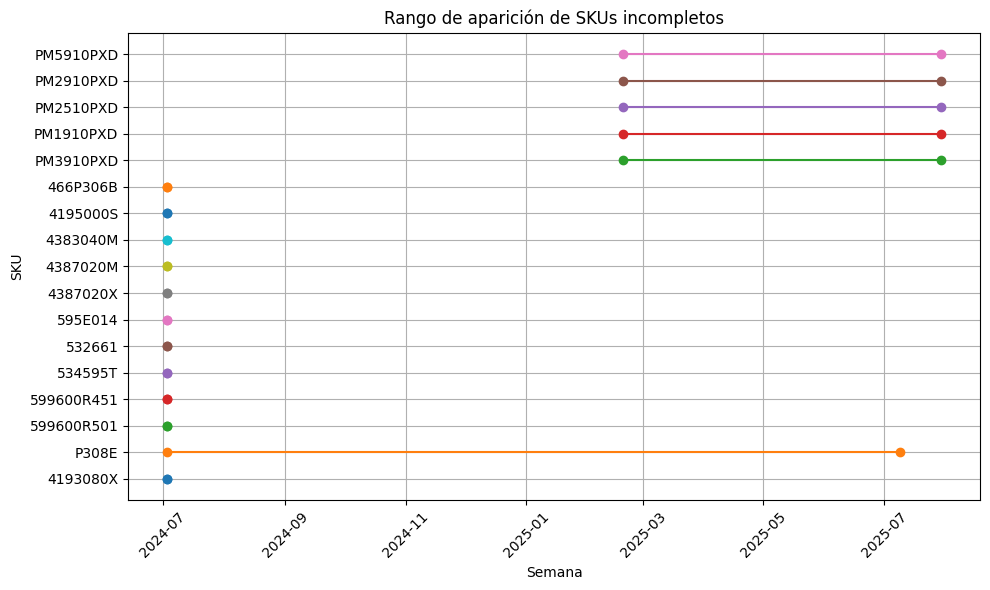

In [11]:
import matplotlib.pyplot as plt

# Ordenar por primera aparición
rangos = rangos.sort_values('primera_semana')

plt.figure(figsize=(10, 6))

for i, row in rangos.iterrows():
    plt.plot([row['primera_semana'], row['ultima_semana']], [row['SKU'], row['SKU']], marker='o')

plt.title("Rango de aparición de SKUs incompletos")
plt.xlabel("Semana")
plt.ylabel("SKU")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


With this visualization we can study the differences on the number of rows, that means the SKUs which are added or removed in different moments, so we can decide how to manage this variation.

### MANAGE SKUs
- SKUs that only appears 1 week --> delete from df
- SKUs that were deleted at some point --> delete from df
- SKUs that were added recently --> create a separate dataframe that will be used in the future

In [12]:
# 1. Get the most recent week in the dataset
last_week = max(all_weeks)

# 2. Merge number of weeks and first/last appearance info for incomplete SKUs
incomplete_sku_info = sku_weeks.merge(rangos, on='SKU')

# 3. Mark SKUs for removal if their last recorded week is before the most recent week
incomplete_sku_info['to_remove'] = (
    incomplete_sku_info['ultima_semana'] < last_week
)

# 4. Extract SKUs to remove
skus_to_remove = incomplete_sku_info[incomplete_sku_info['to_remove']]['SKU']

# 5. Filter the original DataFrame
df_filtered = df[~df['SKU'].isin(skus_to_remove)].copy()

# 6. Summary
print(f"SKUs removed: {len(skus_to_remove)}")
print(f"Original rows: {len(df)}, Rows after filtering: {len(df_filtered)}")

SKUs removed: 12
Original rows: 244658, Rows after filtering: 244593


We are going to split the df_filtered into:
- df_complete: SKUs present in all weeks from the beginning to the end
- df_incomplete: SKUs that were introduced late, but are still active now

We will work with the df_complete and the study how we can make the prediction of the incompleted SKUs later

In [13]:
# 1. Filter SKUs that are present in all weeks — these are the 'complete' ones
skus_complete = sku_weeks[sku_weeks['num_weeks'] == total_weeks]['SKU']

# 2. SKUs that are still in the data but didn't appear from the beginning — 'recently added'
skus_filtered = df_filtered['SKU'].unique()
skus_incomplete = [sku for sku in skus_filtered if sku not in skus_complete.values]

# 3. Split the filtered DataFrame into two
df_complete = df_filtered[df_filtered['SKU'].isin(skus_complete)].copy()
df_incomplete = df_filtered[df_filtered['SKU'].isin(skus_incomplete)].copy()

# 4. Check shapes
print(f"df_complete rows: {len(df_complete)} | unique SKUs: {df_complete['SKU'].nunique()}")
print(f"df_incomplete rows: {len(df_incomplete)} | unique SKUs: {df_incomplete['SKU'].nunique()}")


df_complete rows: 244473 | unique SKUs: 4289
df_incomplete rows: 120 | unique SKUs: 5


## ACTUAL DISTRIBUTION
- df_complete --> unique SKUs: 4289 (total rows: 244473)
- df_incomplete --> unique SKUs: 5 (total rows: 120)

In [35]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ADD,244658.0,30.707829,0.0,0.06,0.59,4.08,10289.59,250.756204
week,244658,2025-01-15 01:05:32.987272192,2024-07-03 00:00:00,2024-10-09 00:00:00,2025-01-15 00:00:00,2025-04-23 00:00:00,2025-07-30 00:00:00,NaN


In [36]:
df_complete.describe().T

,count,mean,min,25%,50%,75%,max,std
ADD,244473.0,30.731049,0.0,0.06,0.6,4.09,10289.59,250.849642
week,244473,2025-01-14 23:59:59.999999488,2024-07-03 00:00:00,2024-10-09 00:00:00,2025-01-15 00:00:00,2025-04-23 00:00:00,2025-07-30 00:00:00,NaN


In [38]:
df_complete.to_excel(os.path.join("./results", 'df_complete.xlsx'), index=False)

In [14]:
df_complete

,SKU,Brand,MFG Class,Resource ID,ADD,week
0,12000210,ARC ROYAL,O01,EM_O01_NL,9.85,2024-07-03
1,12000235,ARC ROYAL,O01,EM_O01_NL,0.76,2024-07-03
2,12000236,ARC ROYAL,O01,EM_O01_NL,9.09,2024-07-03
3,12000237,ARC ROYAL,O02,EM_O02_NL,1.52,2024-07-03
4,12000249,ARC ROYAL,O02,EM_O02_NL,2.65,2024-07-03
...,...,...,...,...,...,...
244653,ZE-6-120,IKAZUCHI ZERO,O84,EM_O84_NL_CN,1.31,2025-07-30
244654,ZE-6-200,IKAZUCHI ZERO,O84,EM_O84_NL_CN,0.08,2025-07-30
244655,ZE-6-250,IKAZUCHI ZERO,O84,EM_O84_NL_CN,0.00,2025-07-30
244656,ZE-8-100P,IKAZUCHI ZERO,O84,EM_O84_NL_CN,9.87,2025-07-30


# Current summary 

df_complete dataset:
* 244,473 records

* 4,289 different SKUs

* 57 weeks (one per Wednesday)

* Variables: SKU, Brand, MFG Class, Resource ID, ADD, week

* Objective 1: predict future ADD for each SKU (univariate)

* Objective 2: estimate the distribution of ADD among resources by SKU

# Supervised preparation - Construction of the dataset for forecasting (lags, features)

### Verify whether there is a correlation between SKUs of the same brand

In [15]:
### Correlación de series temporales dentro de cada Brand

import numpy as np

# Pivot: rows = week, columns = SKU, values = ADD
pivot_df = df_complete.pivot_table(index='week', columns='SKU', values='ADD')

# Map SKU to Brand
sku_to_brand = df_complete.drop_duplicates('SKU')[['SKU', 'Brand']].set_index('SKU')['Brand']

# Correlation matrix within each Brand
brand_corrs = {}

for brand in sku_to_brand.unique():
    skus_in_brand = sku_to_brand[sku_to_brand == brand].index
    subset = pivot_df[skus_in_brand]
    corr_matrix = subset.corr()
    
    # Drop diagonal and take average correlation between SKUs
    mean_corr = corr_matrix.where(~np.eye(len(corr_matrix),dtype=bool)).mean().mean()
    brand_corrs[brand] = mean_corr

# Convert to DataFrame
brand_corr_df = pd.DataFrame.from_dict(brand_corrs, orient='index', columns=['mean_correlation'])


In [16]:
brand_corr_df

,mean_correlation
ARC ROYAL,0.080094
TORQUE DEVICE,NaN
NEEDLE,-0.034060
ZEPHYR,-0.633678
PREFACE,0.331093
...,...
Rain Tibial/Pedal,-0.007256
VASSALLO GT EXT GW,NaN
VASSALLO GT .014,0.161001
VASSALLO GT .018,0.687272


In [17]:
# Crear categorías según los rangos definidos
def classify_corr(val):
    if pd.isna(val):
        return 'NaN'
    elif val > 0.7:
        return '> 0.7'
    elif val > 0.5:
        return '0.5 – 0.7'
    elif val > 0.2:
        return '0.2 – 0.5'
    elif val >= 0:
        return '0 – 0.2'
    else:
        return '< 0'

# Aplicar clasificación
brand_corr_df['corr_range'] = brand_corr_df['mean_correlation'].apply(classify_corr)

# Contar cuántas marcas caen en cada rango
counts_by_range = brand_corr_df['corr_range'].value_counts().sort_index()

print(counts_by_range)


corr_range
0 – 0.2      44
0.2 – 0.5    22
0.5 – 0.7     8
< 0          12
> 0.7         5
NaN           8
Name: count, dtype: int64


Observations: Sí tiene sentido agrupar por Brand, pero solo para algunas marcas (>0.5). Para estas marcas se podria entrenar un modelo adicional por Brand o crear una predicción agregada de ADD por Brand y usarla como feature para cada SKU del grupo. Para el resto, mantener el modelo global con SKU como feature.

Por ahora mejor usar modelo globar y dejar para pruebas a futuro la jerarquia


# GENERATE FEATURES

In [18]:
from sklearn.preprocessing import LabelEncoder

# Aseguramos que la columna de fecha es datetime
df_complete['week'] = pd.to_datetime(df_complete['week'])

# Ordenamos por SKU y semana
df_complete = df_complete.sort_values(['SKU', 'week']).reset_index(drop=True)

# ================================
# 1. Crear lags del ADD por SKU
# ================================
for lag in [1, 2, 3]:
    df_complete[f'lag_{lag}'] = df_complete.groupby('SKU')['ADD'].shift(lag)

# ================================
# 2. Crear delta_1 (cambio entre lag_1 y lag_2)
# ================================
df_complete['delta_1'] = df_complete['lag_1'] - df_complete['lag_2']

# ================================
# 3. Features temporales
# ================================
df_complete['weekofyear'] = df_complete['week'].dt.isocalendar().week

df_complete['sin_week'] = np.sin(2 * np.pi * df_complete['weekofyear'] / 52)
df_complete['cos_week'] = np.cos(2 * np.pi * df_complete['weekofyear'] / 52)

# Crear week_number como posicion secuencial en el tiempo (por fecha única)
week_lookup = {date: idx+1 for idx, date in enumerate(sorted(df_complete['week'].unique()))}
df_complete['week_number'] = df_complete['week'].map(week_lookup)

# ================================
# 4. Codificar SKU (Label Encoding)
# ================================
le = LabelEncoder()
df_complete['SKU_encoded'] = le.fit_transform(df_complete['SKU'])


In [19]:
df_complete

,SKU,Brand,MFG Class,Resource ID,ADD,week,lag_1,lag_2,lag_3,delta_1,weekofyear,sin_week,cos_week,week_number,SKU_encoded
0,12000210,ARC ROYAL,O01,EM_O01_NL,9.85,2024-07-03,NaN,NaN,NaN,NaN,27,-0.120537,-0.992709,1,0
1,12000210,ARC ROYAL,O01,EM_O01_NL,9.09,2024-07-10,9.85,NaN,NaN,NaN,28,-0.239316,-0.970942,2,0
2,12000210,ARC ROYAL,O01,EM_O01_NL,8.71,2024-07-17,9.09,9.85,NaN,-0.76,29,-0.354605,-0.935016,3,0
3,12000210,ARC ROYAL,O01,EM_O01_NL,8.71,2024-07-24,8.71,9.09,9.85,-0.38,30,-0.464723,-0.885456,4,0
4,12000210,ARC ROYAL,O01,EM_O01_NL,8.71,2024-07-31,8.71,8.71,9.09,0.00,31,-0.568065,-0.822984,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244468,ZE-8-120,IKAZUCHI ZERO,O84,EM_O84_NL_CN,2.02,2025-07-02,1.42,1.37,1.34,0.05,27,-0.120537,-0.992709,53,4288
244469,ZE-8-120,IKAZUCHI ZERO,O84,EM_O84_NL_CN,2.03,2025-07-09,2.02,1.42,1.37,0.60,28,-0.239316,-0.970942,54,4288
244470,ZE-8-120,IKAZUCHI ZERO,O84,EM_O84_NL_CN,2.06,2025-07-16,2.03,2.02,1.42,0.01,29,-0.354605,-0.935016,55,4288
244471,ZE-8-120,IKAZUCHI ZERO,O84,EM_O84_NL_CN,2.27,2025-07-23,2.06,2.03,2.02,0.03,30,-0.464723,-0.885456,56,4288


In [20]:
df_complete.to_excel(os.path.join("./results", 'df_features.xlsx'), index=False)

PermissionError: [Errno 13] Permission denied: './results\\df_features.xlsx'

### Determine the optimal number of lags to use (manually)

In [ ]:
from statsmodels.tsa.stattools import pacf

# Umbral de significancia (95% para PACF sin corrección)
sig_threshold = 1.96 / np.sqrt(54)  # 54 semanas efectivas por SKU

# Seleccionar un subconjunto representativo de SKUs (ej: 100 aleatorios)
sku_sample_list = df_complete['SKU'].drop_duplicates().sample(100, random_state=42)

sku_lag_info = []

for sku in sku_sample_list:
    series = df_complete[df_complete['SKU'] == sku].sort_values('week')['ADD'].dropna()
    if len(series) >= 10:  # aseguramos que tenga suficientes puntos para PACF
        pacf_vals = pacf(series, nlags=20, method='ywm')
        max_significant_lag = 0
        for lag_idx, val in enumerate(pacf_vals[1:], start=1):
            if abs(val) > sig_threshold:
                max_significant_lag = lag_idx
        sku_lag_info.append((sku, max_significant_lag))

# Convertir a DataFrame
lag_df = pd.DataFrame(sku_lag_info, columns=['SKU', 'max_significant_lag'])

# Resumen de frecuencia por número de lags significativos
lag_distribution = lag_df['max_significant_lag'].value_counts().sort_index()
print(lag_distribution)


c:\Users\maria.diazalba\OneDrive - Cordis US Corp\0 MARIA\SKU Demand\venv_psr\Lib\site-packages\statsmodels\regression\linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)
c:\Users\maria.diazalba\OneDrive - Cordis US Corp\0 MARIA\SKU Demand\venv_psr\Lib\site-packages\statsmodels\regression\linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)
c:\Users\maria.diazalba\OneDrive - Cordis US Corp\0 MARIA\SKU Demand\venv_psr\Lib\site-packages\statsmodels\regression\linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)
c:\Users\maria.diazalba\OneDrive - Cordis US Corp\0 MARIA\SKU Demand\venv_psr\Lib\site-packages\statsmodels\regression\linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueW

max_significant_lag
0     11
1     51
2      4
3      4
4      4
5      3
6      2
7      1
8      3
9      1
10     2
12     2
13     2
14     6
15     4
Name: count, dtype: int64


c:\Users\maria.diazalba\OneDrive - Cordis US Corp\0 MARIA\SKU Demand\venv_psr\Lib\site-packages\statsmodels\regression\linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


## MODELING

MANUAL
- Select formatted features from the main dataset for modeling
- Delete first 3 weeks (with Nan values due to the lag values creation)
- Split data into train and test sets using temporal split (54 weeks into 47+7)


In [21]:
# Selección de columnas para modelado
model_features = [
    'ADD', 'lag_1', 'lag_2', 'lag_3', 'delta_1',
    'sin_week', 'cos_week', 'week_number', 'SKU_encoded'
]
df_model = df_complete[model_features + ['SKU', 'week']].copy()

# Eliminar las 3 primeras semanas de cada SKU (por falta de lags)
df_model = df_model.sort_values(['SKU', 'week'])
df_model = df_model.groupby('SKU').apply(lambda g: g.iloc[3:]).reset_index(drop=True)

# Confirmamos que ahora cada SKU tiene 54 semanas
# week_number va de 4 a 57

# División temporal: train = semanas 4-50, test = semanas 51-57
train_df = df_model[df_model['week_number'] <= 50].reset_index(drop=True)
test_df = df_model[df_model['week_number'] > 50].reset_index(drop=True)

# Separar features y target
y_train = train_df['ADD']
X_train = train_df.drop(columns=['ADD', 'SKU', 'week'])

y_test = test_df['ADD']
X_test = test_df.drop(columns=['ADD', 'SKU', 'week'])


C:\Users\maria.diazalba\AppData\Local\Temp\ipykernel_121544\3570153838.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_model = df_model.groupby('SKU').apply(lambda g: g.iloc[3:]).reset_index(drop=True)


In [22]:
X_train

,lag_1,lag_2,lag_3,delta_1,sin_week,cos_week,week_number,SKU_encoded
0,8.71,9.09,9.85,-0.38,-0.464723,-0.885456,4,0
1,8.71,8.71,9.09,0.00,-0.568065,-0.822984,5,0
2,8.71,8.71,8.71,0.00,-0.663123,-0.748511,6,0
3,8.71,8.71,8.71,0.00,-0.748511,-0.663123,7,0
4,8.71,8.71,8.71,0.00,-0.822984,-0.568065,8,0
...,...,...,...,...,...,...,...,...
201578,1.35,1.40,1.49,-0.05,0.663123,-0.748511,46,4288
201579,1.35,1.35,1.40,0.00,0.568065,-0.822984,47,4288
201580,1.32,1.35,1.35,-0.03,0.464723,-0.885456,48,4288
201581,1.41,1.32,1.35,0.09,0.354605,-0.935016,49,4288


In [ ]:
y_train

0         8.71
1         8.71
2         8.71
3         8.71
4         8.33
          ... 
201578    1.35
201579    1.32
201580    1.41
201581    1.43
201582    1.34
Name: ADD, Length: 201583, dtype: float64

## Train Dataset Overview
✔️ 1. Formato tabular completo
- Cada fila representa una observación por SKU en una semana
- Cada columna es una feature útil para predecir ADD

✔️ 2. Contiene memoria de la serie (lags y delta) 
- lag_1, lag_2, lag_3: capturan la dinámica pasada inmediata
- delta_1: ayuda a detectar cambios de tendencia

✔️ 3. Captura estacionalidad temporal
- sin_week y cos_week: permiten al modelo aprender ciclos semanales (anuales) sin cortes

✔️ 4. Incluye identidad del SKU
- SKU_encoded: necesario para personalizar la predicción sin entrenar miles de modelos

✔️ 5. Temporalidad preservada
- week_number mantiene el orden cronológico global, útil para capturar tendencias largas si existen

## Next Steps

- Usar skforecast.ForecasterAutoregMultiSeries con LightGBMRegressor.
- Entrenar con tus features ya creados (no hace falta rehacer el dataset).
- Empezar con horizonte 1 (ADD_t+1).
- Luego hacer forecast recursive hasta 4 semanas y evaluar.
- Probar a incluir Differentiator

# MODELING CON skforecast.ForecasterRecursiveMultiSeries + LightGBM Regressor + split temporal simple
Aunque ya teniamos las variables derivadas creadas, esta libreria genera algunas de ellas automaticamente. Esta bien tener este trabajo hecho para otros approaches, pero vamos a guiarnos por la documentacion de esta libreria enfocada en forecasting:
- Quitar lag_1, lag_2, lag_3 → skforecast ya crea los lags internamente con el argumento lags=[1,2,3]
- Quitar delta_1 → es función de los lags; el forecaster lo “aprende” vía sus propios lags.
- Quitar SKU_encoded:En ForecasterRecursiveMultiSeries la identidad del SKU se maneja con el índice de la serie (nivel level) y un encoding interno
- Mantener como exógenas (exog): sin_week, cos_week → estacionalidad cíclica (se pueden proyectar al futuro). + week_number → tendencia/deriva temporal (también proyectable).
- Mantener ADD como target


In [3]:
# libraries
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor

# new skforecast API (>=0.16/0.17)
from skforecast.recursive import ForecasterRecursiveMultiSeries
from skforecast.model_selection import backtesting_forecaster
from sklearn.metrics import mean_absolute_error, mean_squared_error

c:\Users\maria.diazalba\OneDrive - Cordis US Corp\0 MARIA\SKU Demand\venv_psr\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


df es el dataframe que vamos a usar para aplicar los metodos de la libreria skforecast

In [24]:
df = df_complete[['SKU', 'week', 'ADD', 'sin_week', 'cos_week', 'week_number']].copy()

In [26]:
df['week'] = pd.to_datetime(df['week'])
df = df.sort_values(['SKU', 'week'])

In [29]:
# 2) Formato MultiIndex para series y exógenas
# -----------------------------------------------------------
# Serie objetivo en formato largo: índice (SKU, week), una sola columna con el valor
series = (
    df.set_index(['SKU', 'week'])['ADD']
    .sort_index()
)

# Exógenas alineadas con el mismo índice
exog = (
    df.set_index(['SKU', 'week'])[['sin_week', 'cos_week', 'week_number']]
    .sort_index()
)

In [31]:
exog

sin_week  cos_week  week_number
SKU      week                                       
12000210 2024-07-03 -0.120537 -0.992709            1
         2024-07-10 -0.239316 -0.970942            2
         2024-07-17 -0.354605 -0.935016            3
         2024-07-24 -0.464723 -0.885456            4
         2024-07-31 -0.568065 -0.822984            5
...                       ...       ...          ...
ZE-8-120 2025-07-02 -0.120537 -0.992709           53
         2025-07-09 -0.239316 -0.970942           54
         2025-07-16 -0.354605 -0.935016           55
         2025-07-23 -0.464723 -0.885456           56
         2025-07-30 -0.568065 -0.822984           57

[244473 rows x 3 columns]

In [ ]:
# 3) Split temporal simple (semanas 4–50 train, 51–57 test)
#    Usa tu lógica existente; aquí lo hacemos por fecha con una "fecha_corte", usando week_number
# -----------------------------------------------------------
mask_train = exog['week_number'] <= 50
mask_test  = exog['week_number'] >  50

series_train = series[mask_train]
series_test  = series[mask_test]

exog_train = exog[mask_train]
exog_test  = exog[mask_test]

In [37]:
exog_test

sin_week  cos_week  week_number
SKU      week                                       
12000210 2025-06-18  0.120537 -0.992709           51
         2025-06-25      -0.0      -1.0           52
         2025-07-02 -0.120537 -0.992709           53
         2025-07-09 -0.239316 -0.970942           54
         2025-07-16 -0.354605 -0.935016           55
...                       ...       ...          ...
ZE-8-120 2025-07-02 -0.120537 -0.992709           53
         2025-07-09 -0.239316 -0.970942           54
         2025-07-16 -0.354605 -0.935016           55
         2025-07-23 -0.464723 -0.885456           56
         2025-07-30 -0.568065 -0.822984           57

[30023 rows x 3 columns]

In [38]:
# 4) Definir forecaster global con LightGBM y lags internos
# -----------------------------------------------------------
regressor = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    max_depth=-1,
    random_state=42
)

forecaster = ForecasterRecursiveMultiSeries(
    regressor = regressor,
    lags = [1, 2, 3],      # equivalentes a tus lag_1..3, pero generados internamente
    encoding = 'ordinal'   # encoding de IDs de serie; por defecto suele bastar
)

### Parametros:
n_estimators=500 + learning_rate=0.05

- Regla general en GBDT: LR más pequeño + más árboles ⇒ modelo más estable y menos propenso a sobreajuste, manteniendo capacidad de ajuste para no linealidades.
- Partimos de un valor prudente; después ajustaremos con backtesting / grid. Las guías de tuning de LightGBM recomiendan este intercambio LR↔árboles. https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

subsample=0.9 y colsample_bytree=0.9

- Introducen estocasticidad (bagging por filas y columnas) ⇒ regularización que reduce varianza y sobreajuste, especialmente útil con muchas series heterogéneas. Está alineado con la documentación de parámetros.

max_depth=-1

- Deja que LightGBM (crecimiento leaf‑wise) encuentre la profundidad necesaria; combinamos esto con las regularizaciones anteriores. Si detectamos sobreajuste, pasamos a capar profundidad (p.ej. 8–12) o subir min_data_in_leaf. La doc aclara que -1 es “sin límite” y que el algoritmo es leaf‑wise.


In [ ]:

# Convertir a DataFrame con nombre de columna (p.ej. 'y')
series_train_df = series_train.to_frame(name='y')
series_test_df  = series_test.to_frame(name='y')

# exog_train y exog_test ya son DataFrame con MultiIndex (correcto)
# Asegúrate de que índices y tamaños alinean:
assert series_train_df.index.equals(exog_train.index)
assert series_test_df.index.equals(exog_test.index)



In [48]:
def attach_freq_clean(df_multi, freq='W-WED'):
    chunks = []
    for sku, g in df_multi.groupby(level=0):
        g = g.sort_index()
        g2 = g.droplevel(0).asfreq(freq)
        g2.index = pd.MultiIndex.from_product([[sku], g2.index], names=['SKU', 'week'])
        chunks.append(g2)
    return pd.concat(chunks).sort_index()

series_train_df_fix = attach_freq_clean(series_train_df, freq='W-WED')
exog_train_fix      = attach_freq_clean(exog_train,      freq='W-WED')

series_train_df_fix = series_train_df_fix.loc[exog_train_fix.index]
exog_train_fix      = exog_train_fix.loc[series_train_df_fix.index]

In [49]:
series_train_df_fix

y
SKU      week            
12000210 2024-07-03  9.85
         2024-07-10  9.09
         2024-07-17  8.71
         2024-07-24  8.71
         2024-07-31  8.71
...                   ...
ZE-8-120 2025-05-14  1.35
         2025-05-21  1.32
         2025-05-28  1.41
         2025-06-04  1.43
         2025-06-11  1.34

[214450 rows x 1 columns]

In [50]:
# 2) Entrenar ahora sí:
forecaster.fit(
    series = series_train_df_fix,  # DataFrame con MultiIndex y freq pegada
    exog   = exog_train_fix
)

╭────────────────────────────────── InputTypeWarning ──────────────────────────────────╮
│ Passing a DataFrame (either wide or long format) as `series` requires additional     │
│ internal transformations, which can increase computational time. It is recommended   │
│ to use a dictionary of pandas Series instead. For more details, see:                 │
│ https://skforecast.org/latest/user_guides/independent-multi-time-series-forecasting. │
│ html#input-data                                                                      │
│                                                                                      │
│ Category : skforecast.exceptions.InputTypeWarning                                    │
│ Location : c:\Users\maria.diazalba\OneDrive - Cordis US Corp\0 MARIA\SKU             │
│ Demand\venv_psr\Lib\site-packages\skforecast\utils\utils.py:2350                     │
│ Suppress : warnings.simplefilter('ignore', category=InputTypeWarning)                │
╰──────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────── InputTypeWarning ──────────────────────────────────╮
│ Using a long-format DataFrame as `exog` requires additional transformations, which   │
│ can increase computational time. It is recommended to use a dictionary of Series or  │
│ DataFrames instead. For more information, see:                                       │
│ https://skforecast.org/latest/user_guides/independent-multi-time-series-forecasting# │
│ input-data                                                                           │
│                                                                                      │
│ Category : skforecast.exceptions.InputTypeWarning                                    │
│ Location : c:\Users\maria.diazalba\OneDrive - Cordis US Corp\0 MARIA\SKU             │
│ Demand\venv_psr\Lib\site-packages\skforecast\utils\utils.py:2502                     │
│ Suppress : warnings.simplefilter('ignore', category=InputTypeWarning)                │
╰──────────────────────────────────────────────────────────────────────────────────────╯

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1145
[LightGBM] [Info] Number of data points in the train set: 201583, number of used features: 7
[LightGBM] [Info] Start training from score 30.002326


#### [LightGBM] [Info] Number of data points in the train set: 201583, number of used features: 7

Está entrenando con 201,583 filas y 7 features:

- 3 lags generados internamente
- 3 exógenas (sin_week, cos_week, week_number)
- 1 encoding interno del SKU (ordinal por defecto)

In [52]:
forecaster

============================== 
ForecasterRecursiveMultiSeries 
============================== 
Regressor: LGBMRegressor 
Lags: [1 2 3] 
Window features: None 
Window size: 3 
Series encoding: ordinal 
Series names (levels): 
    12000210, 12000235, 12000236, 12000237, 12000249, 12000304, 12000608, 12000813,
    12000836, 12001624, 12001733, 12001734, 12001736, 12001737, 12001738,
    12001740, 12001741, 12001743, 12001771, 12001776, 12001855, 12001856,
    12001915, 12003704, 12004924, ..., ZE-15-300, ZE-15-325, ZE-15-350,
    ZE-15-375, ZE-15-400, ZE-20-150, ZE-20-200, ZE-20-225, ZE-20-250, ZE-20-275,
    ZE-20-300, ZE-20-325, ZE-20-350, ZE-20-375, ZE-20-400, ZE-30-200, ZE-30-250,
    ZE-30-300, ZE-30-350, ZE-6-100P, ZE-6-120, ZE-6-200, ZE-6-250, ZE-8-100P,
    ZE-8-120 
Exogenous included: True 
Exogenous names: sin_week, cos_week, week_number 
Transformer for series: None 
Transformer for exog: None 
Weight function included: False 
Series weights: None 
Differentiation order: None 
Training range: 
    '12000210': ['2024-07-03', '2025-06-11'], '12000235': ['2024-07-03',
    '2025-06-11'], '12000236': ['2024-07-03', '2025-06-11'], '12000237':
    ['2024-07-03', '2025-06-11'], '12000249': ['2024-07-03', '2025-06-11'], ...,
    'ZE-6-120': ['2024-07-03', '2025-06-11'], 'ZE-6-200': ['2024-07-03',
    '2025-06-11'], 'ZE-6-250': ['2024-07-03', '2025-06-11'], 'ZE-8-100P':
    ['2024-07-03', '2025-06-11'], 'ZE-8-120': ['2024-07-03', '2025-06-11'] 
Training index type: DatetimeIndex 
Training index frequency: W-WED 
Regressor parameters: 
    {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.9,
    'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1,
    'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0,
    'n_estimators': 500, 'n_jobs': None, 'num_leaves': 31, 'objective': None,
    'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 0.9,
    'subsample_for_bin': 200000, 'subsample_freq': 0} 
fit_kwargs: {} 
Creation date: 2025-08-20 13:15:48 
Last fit date: 2025-08-20 13:47:07 
Skforecast version: 0.17.0 
Python version: 3.13.5 
Forecaster id: None

In [54]:
# Creamos series_test_df_fix y exog_test_fix con attach_freq_clean()
series_test_df_fix = attach_freq_clean(series_test_df, freq='W-WED')
exog_test_fix = attach_freq_clean(exog_test, freq='W-WED')


# Limpiar columnas duplicadas si hace falta (por seguridad)
if 'SKU' in series_test_df_fix.columns:
    series_test_df_fix = series_test_df_fix.drop(columns='SKU')
if 'SKU' in exog_test_fix.columns:
    exog_test_fix = exog_test_fix.drop(columns='SKU')


# Alinear por MultiIndex (SKU, week)
series_test_df_fix = series_test_df_fix.loc[exog_test_fix.index]
exog_test_fix = exog_test_fix.loc[series_test_df_fix.index]

In [59]:
# Prediccion
import pandas as pd

# h = horizonte (ej. 4 semanas)
h = 4

# Predicción global (en bloque)
y_pred_all = forecaster.predict(
steps = h,
exog = exog_test_fix
)

# Reset index y asigna nombres correctos
preds_all_df = y_pred_all.reset_index()

# Inspeccionar columnas
print(preds_all_df.columns)

# Renombrar de forma segura
col_rename = {}
if 'level' in preds_all_df.columns:
    col_rename['level'] = 'SKU'
if 'index' in preds_all_df.columns:
    col_rename['index'] = 'week'
if 'pred' in preds_all_df.columns:
    col_rename['pred'] = 'y_pred'

preds_all_df = preds_all_df.rename(columns=col_rename)

# y_true viene del test real
y_true_all_df = series_test_df_fix.reset_index()[['SKU', 'week', 'y']].rename(columns={'y': 'y_true'})

# Unir verdad + predicción por SKU + week
df_eval = pd.merge(preds_all_df, y_true_all_df, on=['SKU', 'week'], how='inner')


KeyError: 'week'

In [61]:
# -----------------------------------------------------------
# Predicción global (en bloque) + merge robusto con verdad de test
# Soporta diferentes formas de salida de skforecast.predict()
# -----------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Horizonte
h = 4

# 1) Predicción global
y_pred_all = forecaster.predict(
    steps=h,
    exog=exog_test_fix
)


# 2) Normalizar salida a DataFrame con columnas ['SKU','week','y_pred']
# y_pred_all puede ser DataFrame con:
# a) index = fechas futuras, cols = ['level','pred']
# b) index MultiIndex (SKU, step) y col 'pred'
# c) otras variaciones menores de nombres


if isinstance(y_pred_all, pd.Series):
    y_pred_all = y_pred_all.to_frame(name='pred')


preds_all_df = y_pred_all.reset_index()
cols = list(preds_all_df.columns)


# Detectar/renombrar columna de SKU
if 'level' in cols:
    preds_all_df = preds_all_df.rename(columns={'level': 'SKU'})
elif 'SKU' not in cols:
    # Si el SKU viene en el índice (caso b):
    for c in cols:
        if str(c).lower() in {'sku', 'series', 'id', 'level_0'}:
            preds_all_df = preds_all_df.rename(columns={c: 'SKU'})
            break


# Detectar/renombrar columna de fecha/semana
if 'week' not in preds_all_df.columns:
    # Si el índice anterior no tenía nombre, pandas lo llama 'index'
    if 'index' in preds_all_df.columns:
        preds_all_df = preds_all_df.rename(columns={'index': 'week'})
    else:
        # En el caso (b), puede venir como 'level_1' o 'step' (no es fecha). Si es 'step', mapearemos a fecha abajo.
        for c in cols:
            if str(c).lower() in {'week', 'date', 'ds', 'fecha', 'level_1'}:
                preds_all_df = preds_all_df.rename(columns={c: 'week'})
                break


# Detectar/renombrar columna de predicción
if 'pred' in preds_all_df.columns:
    preds_all_df = preds_all_df.rename(columns={'pred': 'y_pred'})
elif 'y_pred' not in preds_all_df.columns:
    # Toma la última columna numérica como predicción si falta nombre estándar
    for c in preds_all_df.columns[::-1]:
        if pd.api.types.is_numeric_dtype(preds_all_df[c]):
            preds_all_df = preds_all_df.rename(columns={c: 'y_pred'})
            break


# Si la columna 'week' no existe pero hay 'step', mapear 'step' -> fechas usando última semana de train por SKU
if 'week' not in preds_all_df.columns and 'step' in preds_all_df.columns:
    # última semana de train por SKU
    last_weeks = series_train_df_fix.reset_index().groupby('SKU')['week'].max()
    def step_to_week(row):
        base = last_weeks[row['SKU']]
        # avanzamos 'step' semanas; nuestra frecuencia es W-WED (weekday=2)
        return (base + pd.to_timedelta(row['step'], unit='W'))
    preds_all_df['week'] = preds_all_df.apply(step_to_week, axis=1)


# Mantener solo columnas necesarias y tipos correctos
keep_cols = [c for c in ['SKU', 'week', 'y_pred'] if c in preds_all_df.columns]
preds_all_df = preds_all_df[keep_cols].copy()


# 3) Verdad de test (y_true)
y_true_all_df = (
    series_test_df_fix.reset_index()[['SKU', 'week', 'y']]
    .rename(columns={'y': 'y_true'})
)

In [65]:
# Asegurar tipos comparables: week como datetime64
preds_all_df['week'] = pd.to_datetime(preds_all_df['week'])
y_true_all_df['week'] = pd.to_datetime(y_true_all_df['week'])


df_eval = pd.merge(preds_all_df, y_true_all_df, on=['SKU', 'week'], how='inner')

In [66]:
df_eval

,SKU,week,y_pred,y_true
0,12000210,2025-06-18,6.920828,6.06
1,12000235,2025-06-18,0.043989,0.00
2,12000236,2025-06-18,2.504190,2.65
3,12000237,2025-06-18,0.043989,0.00
4,12000249,2025-06-18,1.586784,1.52
...,...,...,...,...
17151,ZE-6-120,2025-07-09,1.922528,1.87
17152,ZE-6-200,2025-07-09,0.062343,0.05
17153,ZE-6-250,2025-07-09,0.046332,0.00
17154,ZE-8-100P,2025-07-09,6.863982,9.37


#### Workflow de las predicciones: 
Devuelve 4 valores, uno para cada uno de los próximos 4 pasos semanales — es decir:
- step 1 = predicción para semana t+1
- step 2 = predicción para semana t+2
- step 3 = predicción para semana t+3
- step 4 = predicción para semana t+4

Esto se hace mediante estrategia recursiva:

- El modelo primero predice t+1 usando lag_1, lag_2, lag_3 reales
- Luego usa la predicción de t+1 como nuevo lag_1 para predecir t+2 ...y así hasta t+4

🔁 Por eso se llama recursive multi-step forecasting

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

mae  = mean_absolute_error(df_eval['y_true'], df_eval['y_pred'])
rmse = root_mean_squared_error(df_eval['y_true'], df_eval['y_pred'])
mape = (np.abs((df_eval['y_true'] - df_eval['y_pred']) / df_eval['y_true'])
.replace([np.inf, -np.inf], np.nan).dropna().mean()) * 100


print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.2f}%")

MAE: 5.843
RMSE: 74.483
MAPE: 32.40%


Qué ajustaría después (plan de tuning)

Backtesting multi‑ventana para validar robustez y evitar suerte/mala suerte del último split.

Búsqueda de lags (p.ej. probar [1,2,3,4], [1,2,3,6]) y de LR / n_estimators (p.ej. LR ∈ {0.03, 0.05, 0.1}).

Regularización si hay sobreajuste: max_depth (8–12), min_data_in_leaf (≥50), o bajar algo subsample/colsample.

Explorar encoding='ordinal_category' si queremos que LightGBM trate el ID como categórico (según doc del forecaster), evaluando coste/beneficio. 